In [23]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')


df = pd.read_csv("../../edit_data/cleaned_data/movies.csv")
df.head()


,Unnamed: 0,Id,Original_Title,Original_Language,Spoken_Languages,Budget,Revenue,Runtime,Release_Date,Production_Companies,Production_Countries,imdb_id,Popularity,Vote_Average,Vote_Count,Belongs_To_Collection,Tagline,Overview,Genres
0,0,862,Toy Story,en,"[{'iso_639_1': 'en', 'name': 'English'}]",30000000.0,373554033.0,81.0,1995-10-30,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",tt0114709,21.946943,7.7,5415.0,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,1,8844,Jumanji,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",65000000.0,262797249.0,104.0,1995-12-15,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",tt0113497,17.015539,6.9,2413.0,NaN,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,2,15602,Grumpier Old Men,en,"[{'iso_639_1': 'en', 'name': 'English'}]",0.0,0.0,101.0,1995-12-22,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",tt0113228,11.712900,6.5,92.0,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,3,31357,Waiting to Exhale,en,"[{'iso_639_1': 'en', 'name': 'English'}]",16000000.0,81452156.0,127.0,1995-12-22,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",tt0114885,3.859495,6.1,34.0,NaN,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,4,11862,Father of the Bride Part II,en,"[{'iso_639_1': 'en', 'name': 'English'}]",0.0,76578911.0,106.0,1995-02-10,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",tt0113041,8.387519,5.7,173.0,"{'id': 96871, 'name': 'Father of the Bride Col...",Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]"


In [24]:
# Extract the release year from the release_date column
df['Release_Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year

# Convert to integer, coerce errors, and replace NaN with blank
df['Release_Year'] = pd.to_numeric(df['Release_Year'], errors='coerce').fillna('').astype(str).str.replace('.0', '', regex=False)
df['Release_Year'].head()

0    1995
1    1995
2    1995
3    1995
4    1995
Name: Release_Year, dtype: object

Text(0, 0.5, 'Count')

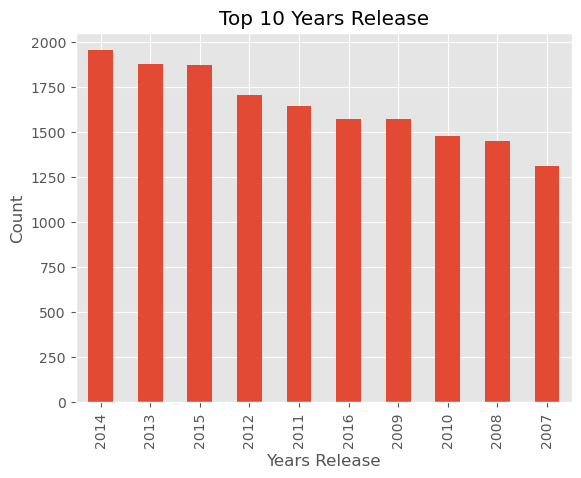

In [25]:
#Histogram Top 10 years of release
ax = df['Release_Year'].value_counts().head(10).plot(kind='bar', title='Top 10 Years Release')

ax.set_xlabel('Years Release')
ax.set_ylabel('Count')

<Axes: xlabel='Vote_Average', ylabel='Vote_Count'>

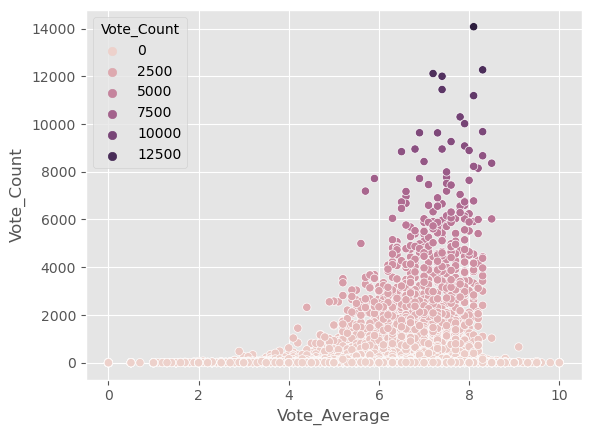

In [26]:
## dentity scatter plot to show relationship between vote counts and vote score. 
sns.scatterplot(x='Vote_Average', y='Vote_Count', hue='Vote_Count',data=df)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

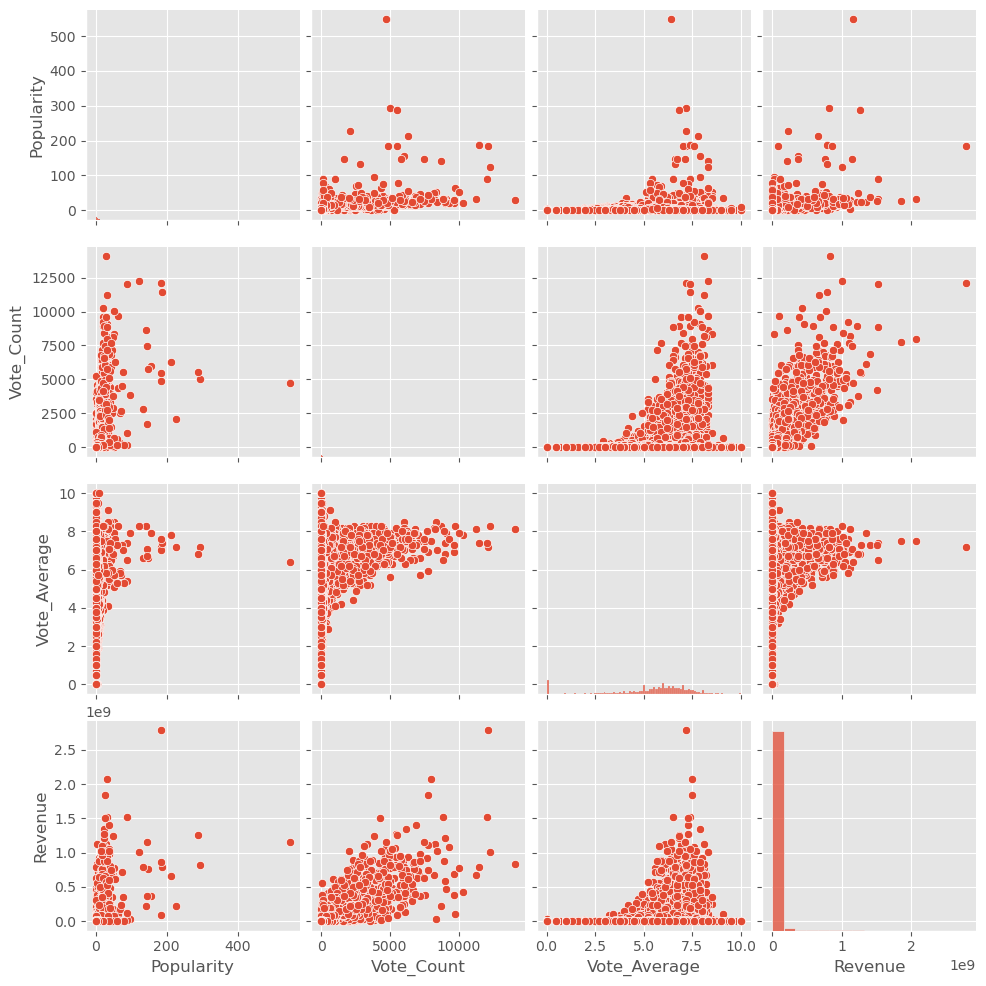

In [44]:
# pairplot
sns.pairplot(df, vars=['Popularity', 'Vote_Count', 'Vote_Average','Revenue'])

In [45]:
df_corr = df[['Vote_Count', 'Vote_Average','Revenue','Popularity']].dropna().corr()
df_corr

,Vote_Count,Vote_Average,Revenue,Popularity
Vote_Count,1.000000,0.124225,0.811970,0.560510
Vote_Average,0.124225,1.000000,0.084233,0.155681
Revenue,0.811970,0.084233,1.000000,0.506756
Popularity,0.560510,0.155681,0.506756,1.000000


<Axes: >

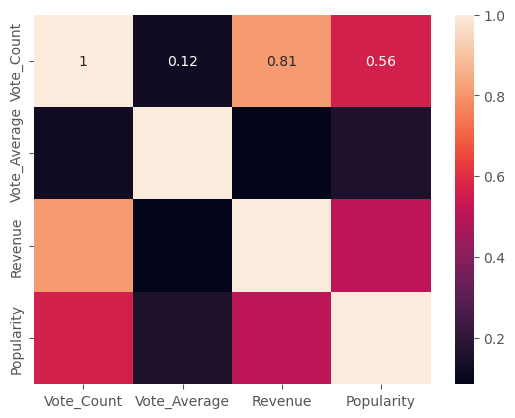

In [46]:
# Heatmap
sns.heatmap(df_corr, annot=True)

Text(0, 0.5, 'Revenue (USD)')

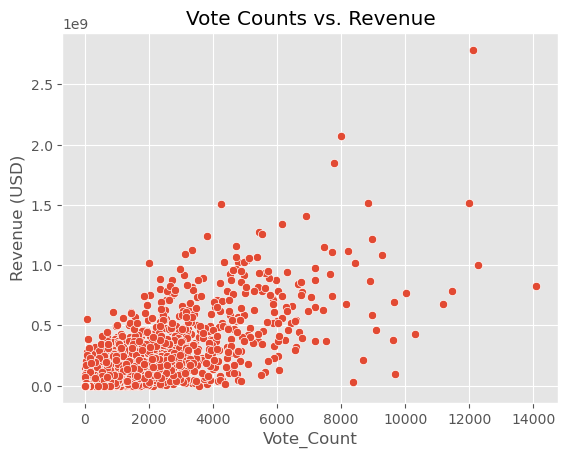

In [42]:
## scatter plot Vote_Count vs. Revenue
xa = sns.scatterplot(x='Vote_Count', y='Revenue', data=df)
xa.set_title("Vote Counts vs. Revenue")
xa.set_ylabel("Revenue (USD)")

In [32]:
## Group by language to calculate years release. Drop anything with less than 300 movie count
df.groupby('Original_Language')['Vote_Average'].agg(['mean','count']).query('count>=300').sort_values(by='count', ascending=False)


,mean,count
Original_Language,,
en,5.498490,31852
fr,6.059627,2415
it,5.466600,1509
ja,6.290875,1337
de,5.862593,1072
es,5.705295,982
ru,5.716748,818
hi,5.796806,501
ko,6.570522,441


Text(0, 0.5, 'User rating')

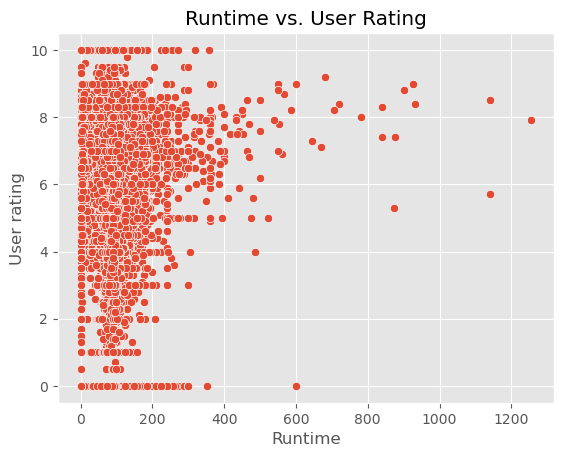

In [5]:
## scatter plot Runtime vs User Rating
xa = sns.scatterplot(x='Runtime', y='Vote_Average', data=df)
xa.set_title("Runtime vs. User Rating")
xa.set_ylabel("User rating")